# Deep Learning with Convolutional Neural Networks

We saw how neural networks work in the last two chapters. Neural networks consist of neurons that have weights and biases. These weights and biases are tuned during the training process to come up with a good learning model. Each neuron receives a set of inputs, processes it in some way, and then outputs a value. __If we build a neural network with many layers, it's called a deep neural network.__ The branch of Artificial Intelligence dealing with these deep neural networks is referred to as deep learning.

## Architecture of CNNs


When we are working with ordinary neural networks, we need to convert the input data into a single vector. This vector acts as the input to the neural network, which then passes through the layers of the neural network. In these layers, each neuron is connected to all the neurons in the previous layer. It is also worth noting that the neurons within each layer are not connected to each other. They are only connected to the neurons in the adjacent layers. The last layer in the network is the output layer and it represents the final output.



If we use this structure for images, it will quickly become unmanageable. For example, let's consider an image dataset consisting of 256x256 RGB images. Since these are 3 channel images, there would be 256 * 256 * 3 = 196,608 weights. Note that this is just for a single neuron! Each layer will have multiple neurons, so the number of weights tends to increase rapidly. This means that the model will now have an enormous number of parameters to tune during the training process. This is why it becomes very complex and time-consuming. Connecting each neuron to every neuron in the previous layer, called full connectivity, is clearly not going to work for us.



# Building a perceptron-based linear regressor


We will see how to build a linear regression model using perceptrons. We have already seen linear regression in previous chapters, but this section is about building a linear regression model using a neural network approach.



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

We will be generating some datapoints and see how we can fit a model to it. Define the number of datapoints to be generated:



In [2]:
# Define the number of points to generate 
num_points = 1200 

Define the parameters that will be used to generate the data. We will be using the model of a line: __y = mx + c:__



In [3]:
# Generate the data based on equation y = mx + c 
data = [] 
m = 0.2 
c = 0.5 
for i in range(num_points): 
    # Generate 'x'  
    x = np.random.normal(0.0, 0.8) 

    # Generate some noise 
    noise = np.random.normal(0.0, 0.04) 
    # Compute 'y'  
    y = m*x + c + noise  
    data.append([x, y]) 
    




Once you finish iterating, separate the data into input and output variables:




In [4]:
# Separate x and y 
x_data = [d[0] for d in data] 
y_data = [d[1] for d in data] 

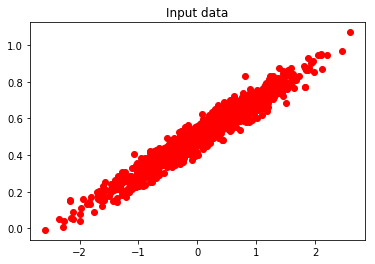

In [5]:
# Plot the generated data 
plt.plot(x_data, y_data, 'ro') 
plt.title('Input data') 
plt.show() 

Generate weights and biases for the perceptron. For weights, we will use a uniform random number generator and set the biases to zero:



In [6]:
# Generate weights and biases 
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) 
b = tf.Variable(tf.zeros([1])) 

Define the equation using TensorFlow variables:

In [7]:
# Define equation for 'y' 
y = W * x_data + b 

Define the loss function that can be used during the training process. The optimizer will try to minimize this value as much as possible.



In [8]:
# Define how to compute the loss 
loss = tf.reduce_mean(tf.square(y - y_data)) 

Define the gradient descent optimizer and specify the loss function:



In [9]:
# Define the gradient descent optimizer 
optimizer = tf.train.GradientDescentOptimizer(0.5) 
train = optimizer.minimize(loss) 


All the variables are in place, but they haven't been initialized yet. Let's do that:



In [10]:
# Initialize all the variables 
init = tf.initialize_all_variables() 


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Start the TensorFlow session and run it using the initializer:



In [11]:
# Start the tensorflow session and run it 
sess = tf.Session() 
sess.run(init) 


Start the training process:




ITERATION 1
W = -0.067810774
b = 0.49715236
loss = 0.04824992
loss(percent) =  4.824991896748543


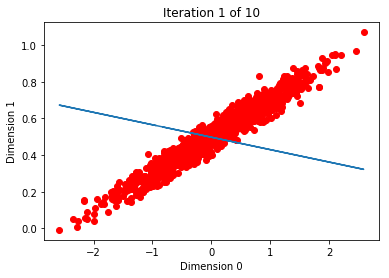


ITERATION 2
W = 0.10530144
b = 0.49874526
loss = 0.007573664
loss(percent) =  0.757366418838501


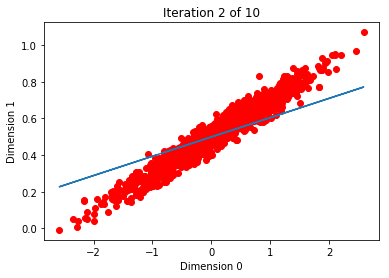


ITERATION 3
W = 0.16713971
b = 0.49931973
loss = 0.0023832629
loss(percent) =  0.2383262850344181


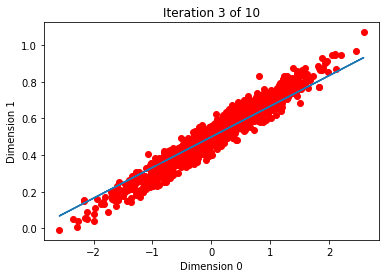


ITERATION 4
W = 0.18922928
b = 0.49952492
loss = 0.0017209537
loss(percent) =  0.1720953732728958


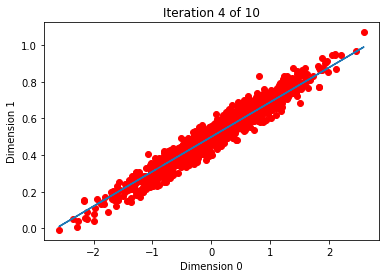


ITERATION 5
W = 0.19712001
b = 0.49959823
loss = 0.0016364412
loss(percent) =  0.1636441214941442


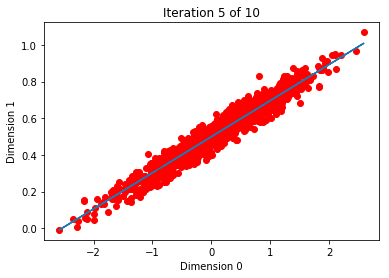


ITERATION 6
W = 0.1999387
b = 0.4996244
loss = 0.0016256573
loss(percent) =  0.16256573144346476


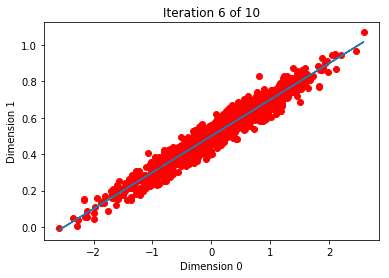


ITERATION 7
W = 0.20094559
b = 0.49963376
loss = 0.0016242812
loss(percent) =  0.16242811689153314


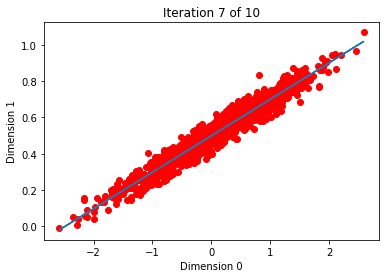


ITERATION 8
W = 0.20130526
b = 0.4996371
loss = 0.0016241057
loss(percent) =  0.16241057310253382


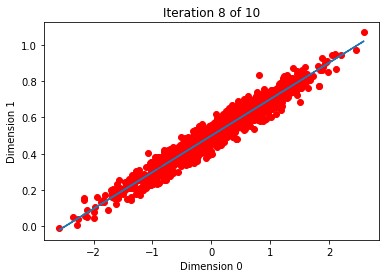


ITERATION 9
W = 0.20143373
b = 0.4996383
loss = 0.0016240831
loss(percent) =  0.16240831464529037


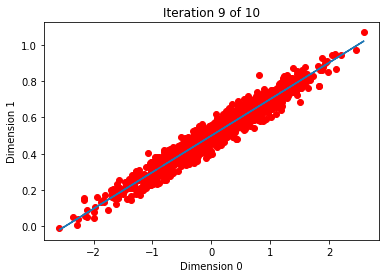


ITERATION 10
W = 0.20147963
b = 0.49963874
loss = 0.0016240806
loss(percent) =  0.16240805853158236


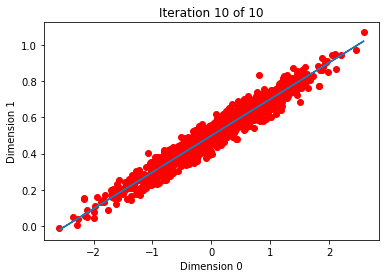

In [12]:
# Start iterating 
num_iterations = 10 
for step in range(num_iterations): 
    # Run the session 
    sess.run(train) 
    
    # Print the progress 
    print('\nITERATION', step+1) 
    print('W =', sess.run(W)[0]) 
    print('b =', sess.run(b)[0]) 
    print('loss =', sess.run(loss)) 
    print('loss(percent) = ', sess.run(loss) * 100) 
    # Plot the input data  
    plt.plot(x_data, y_data, 'ro') 

    # Plot the predicted output line 
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b)) 
    
    # Set plotting parameters 
    plt.xlabel('Dimension 0') 
    plt.ylabel('Dimension 1') 
    plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations)) 
    plt.show() 